## Tweet Analysis and Clustering!

This [dataset](https://archive.ics.uci.edu/ml/datasets/Health+News+in+Twitter#) contains health news from more than 15 major health news agencies such as BBC, CNN, and NYT.

Columns we have:  
-  tweet id  
- date and time  
- tweet  

#### Our Objective:  
- To cluster Similar Texts/Tweets using Clustering and Present useful inferences.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
nltk.download('stopwords')
nltk.download('wordnet')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mishr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
data = pd.read_csv('Health-Tweets/bbchealth.txt', sep="|", header=None)
data.columns = ["tweet_id", "date_time", "tweet_text"]
data.head()

,tweet_id,date_time,tweet_text
0,585978391360221184,Thu Apr 09 01:31:50 +0000 2015,Breast cancer risk test devised http://bbc.in/...
1,585947808772960257,Wed Apr 08 23:30:18 +0000 2015,GP workload harming care - BMA poll http://bbc...
2,585947807816650752,Wed Apr 08 23:30:18 +0000 2015,Short people's 'heart risk greater' http://bbc...
3,585866060991078401,Wed Apr 08 18:05:28 +0000 2015,New approach against HIV 'promising' http://bb...
4,585794106170839041,Wed Apr 08 13:19:33 +0000 2015,Coalition 'undermined NHS' - doctors http://bb...


In [3]:
data.info() # Checking columns and number of entries
print('-------------------------')
print(round(data.isnull().sum()/len(data),2)) # Checking for any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3929 entries, 0 to 3928
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    3929 non-null   int64 
 1   date_time   3929 non-null   object
 2   tweet_text  3929 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.2+ KB
-------------------------
tweet_id      0.0
date_time     0.0
tweet_text    0.0
dtype: float64


In [5]:
X_train = data.drop(columns=['tweet_id','date_time']).reset_index(drop=True)
X_train.head()
print(X_train.shape)

(3929, 1)


In [6]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    4. Remove words
    '''
    stemmer = WordNetLemmatizer()
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join([i for i in nopunc if not i.isdigit()])
    nopunc =  [word.lower() for word in nopunc.split() if word not in stopwords.words('english')]
    return [stemmer.lemmatize(word) for word in nopunc]

X_train['tweet_text'] = X_train['tweet_text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
X_train['tweet_text'] = X_train['tweet_text'].apply(lambda x: re.split('http:\/\/.*', str(x))[0])

The above function is created for **line by line** manipulation, hence we will use **df.values** to access all rows at once!  

Vectorization is nothing but creating a vector of words called vocabulary.  
***TFIDF Vectorizer is used to create a vocabulary. TFIDF is a product of how frequent a word is in a document multiplied by how unique a word is w.r.t the entire corpus. ngram_range parameter : which will help to create one , two or more word vocabulary depending on the requirement.***

In [7]:
tfidfconvert = TfidfVectorizer(analyzer=text_process,ngram_range=(1,3)).fit(X_train.tweet_text)

X_transformed=tfidfconvert.transform(X_train.tweet_text)

In [8]:
# Checking the length of the Vocabulary Created!
len(tfidfconvert.vocabulary_)

3933

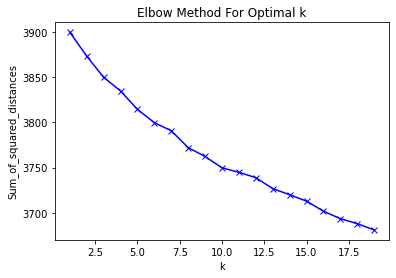

In [9]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_transformed)
    Sum_of_squared_distances.append(km.inertia_)


import matplotlib.pyplot as plt

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

[Source for Yellow Brick Library!](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#:~:text=K%2Dmeans%20is%20a%20simple,right%20k%20for%20the%20dataset.)

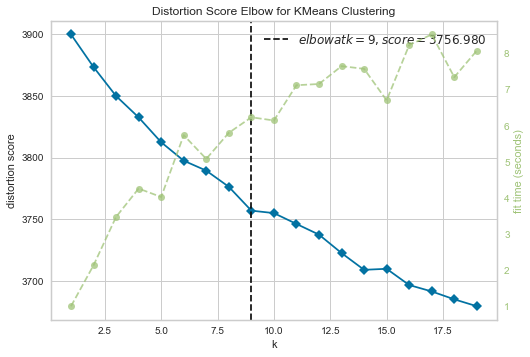

In [10]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))
# visualizer = kelbow_visualizer(KMeans(random_state=4), X_transformed, k=(2,50))
visualizer.fit(X_transformed)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

**elbow_value_** gives the optimal number of clusters as integer and we can directly **plugin** the value for final modelling!

In [11]:
optimal_k = visualizer.elbow_value_
print('Optimal K found is:', optimal_k)

Optimal K found is: 9


In [12]:
# Clustering the training sentences with K-means technique

modelkmeans = KMeans(n_clusters=optimal_k, init='k-means++', n_init=100)
modelkmeans.fit(X_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Visualizing the Labels on a Scatter Plot!

In [13]:
modelkmeans.predict(X_transformed)

array([8, 6, 0, ..., 5, 4, 0])

In [14]:
modelkmeans.labels_

array([8, 6, 0, ..., 5, 4, 0])

In [15]:
pca = PCA(n_components=2, random_state=42)
reduced_features = pca.fit_transform(X_transformed.toarray())

# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(modelkmeans.cluster_centers_)

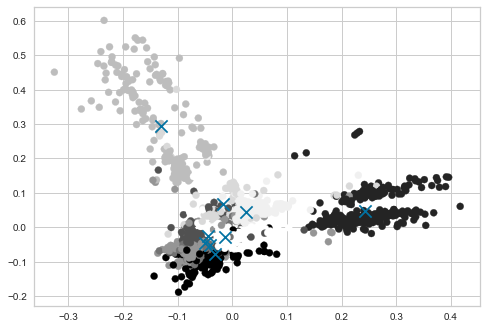

In [16]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=modelkmeans.predict(X_transformed));
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b');

In [17]:
modelkmeans.score

<bound method KMeans.score of KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=9, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)>

In [18]:
print(X_transformed.data)

[0.38227864 0.35933437 0.66167655 ... 0.48970863 0.2977278  0.4454355 ]


In [19]:
tfidfconvert.decode(X_transformed)

<3929x3933 sparse matrix of type '<class 'numpy.float64'>'
	with 18819 stored elements in Compressed Sparse Row format>

It is important to understand that **regular Kmeans implementation is too slow**, hence the same is achieved using **MiniBatchKMeans** and we can pass the datapoints in batches which makes easier to cluster bigram related words.  
Also, we will look at the top words, under each cluster to start concluding!

In [20]:
clusters = MiniBatchKMeans(n_clusters=optimal_k, init_size=1024, batch_size=2048, random_state=20).fit_predict(X_transformed)

In [21]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    final_df = pd.DataFrame(columns=['Cluster','Cluster Words'])
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
        x = i
        y = [labels[t] for t in np.argsort(r)[-n_terms:]]
        final_df = final_df.append({'Cluster' : x , 'Cluster Words' : y} , ignore_index=True)
    return final_df

In [22]:
final_df = get_top_keywords(X_transformed, clusters, tfidfconvert.get_feature_names(), 15)


Cluster 0
surgery,test,aampe,heart,brain,new,may,doctor,drug,baby,risk,call,patient,hospital,audio

Cluster 1
life,concern,plan,face,failing,nh,patient,social,need,poor,elderly,video,hospital,home,care

Cluster 2
danger,medicine,bedroom,girl,day,secret,effect,problem,vaccine,nh,cost,ebola,man,video,the

Cluster 3
trust,£bn,labour,winter,plan,waiting,time,strike,new,target,england,staff,aampe,video,nh

Cluster 4
cancer,avoidable,feed,rise,inquiry,police,family,trust,ebola,video,patient,baby,hospital,rate,death

Cluster 5
target,rate,cut,linked,half,risk,lung,diagnosis,nh,skin,test,video,drug,breast,cancer

Cluster 6
i,uk,doctor,service,cut,hospital,how,risk,patient,warning,new,help,mental,health,video

Cluster 7
surgery,tooth,decay,issue,help,smoking,car,abuse,call,parent,obesity,mental,video,health,child

Cluster 8
u,outbreak,screening,trial,who,how,sierra,liberia,nurse,case,leone,vaccine,uk,video,ebola


In [23]:
pd.set_option("max_colwidth", None)
final_df.head(20)

,Cluster,Cluster Words
0,0,"[surgery, test, aampe, heart, brain, new, may, doctor, drug, baby, risk, call, patient, hospital, audio]"
1,1,"[life, concern, plan, face, failing, nh, patient, social, need, poor, elderly, video, hospital, home, care]"
2,2,"[danger, medicine, bedroom, girl, day, secret, effect, problem, vaccine, nh, cost, ebola, man, video, the]"
3,3,"[trust, £bn, labour, winter, plan, waiting, time, strike, new, target, england, staff, aampe, video, nh]"
4,4,"[cancer, avoidable, feed, rise, inquiry, police, family, trust, ebola, video, patient, baby, hospital, rate, death]"
5,5,"[target, rate, cut, linked, half, risk, lung, diagnosis, nh, skin, test, video, drug, breast, cancer]"
6,6,"[i, uk, doctor, service, cut, hospital, how, risk, patient, warning, new, help, mental, health, video]"
7,7,"[surgery, tooth, decay, issue, help, smoking, car, abuse, call, parent, obesity, mental, video, health, child]"
8,8,"[u, outbreak, screening, trial, who, how, sierra, liberia, nurse, case, leone, vaccine, uk, video, ebola]"
